<img src="imgs/header.png">

# Challenge 1: Fix the script!
This script does not work! Remember what we learned about the vtk pipeline and how the data is exchanged between the different parts of the pipeline and fix it!. Once you fix it, write a brief description of what you did to fix it. Also embed an image of the result in your notebook (__Tip.__ Use the `vtk_show` function).

In [8]:
import vtk

In [9]:
from IPython.display import Image
def vtk_show(renderer, width=400, height=300):
    """
    Takes vtkRenderer instance and returns an IPython Image with the rendering.
    """
    renderWindow = vtk.vtkRenderWindow()
    renderWindow.SetOffScreenRendering(1)
    renderWindow.AddRenderer(renderer)
    renderWindow.SetSize(width, height)
    renderWindow.Render()
     
    windowToImageFilter = vtk.vtkWindowToImageFilter()
    windowToImageFilter.SetInput(renderWindow)
    windowToImageFilter.Update()
     
    writer = vtk.vtkPNGWriter()
    writer.SetWriteToMemory(1)
    writer.SetInputConnection(windowToImageFilter.GetOutputPort())
    writer.Write()
    data = bytes(memoryview(writer.GetResult()))
    
    return Image(data)

In [10]:
pl3d = vtk.vtkMultiBlockPLOT3DReader()
xyx_file = "data/combxyz.bin"
q_file = "data/combq.bin"
pl3d.SetXYZFileName(xyx_file)
pl3d.SetQFileName(q_file)
pl3d.SetScalarFunctionNumber(100)
pl3d.SetVectorFunctionNumber(202)
pl3d.Update()

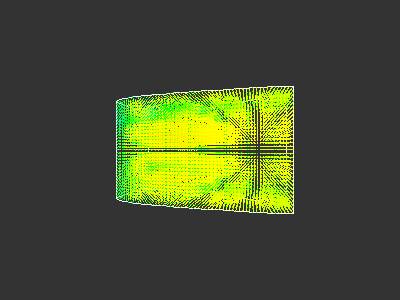

In [11]:
blocks = pl3d.GetOutput()
b0 = blocks.GetBlock(0)

#Points source
points = vtk.vtkVertexGlyphFilter()
points.SetInputData(b0)

#Outline source
outline = vtk.vtkStructuredGridOutlineFilter()
outline.SetInputData(b0)

#Scalars Mapper (from points)
scalarsMapper = vtk.vtkPolyDataMapper()
scalarsMapper.SetInputConnection(points.GetOutputPort())
scalarsMapper.SetScalarModeToUsePointData()

#Outline mapper
outlineMapper = vtk.vtkPolyDataMapper()
outlineMapper.SetInputConnection(outline.GetOutputPort())

#Scalars Actor
scalarsActor = vtk.vtkActor()
scalarsActor.SetMapper(scalarsMapper)

#Outline Actor
outlineActor = vtk.vtkActor()
outlineActor.SetMapper(outlineMapper)
outlineActor.GetProperty().SetColor(1,1,1)

#Renderer and RenderWindow

renderer = vtk.vtkRenderer()
renderer.AddActor(scalarsActor)
renderer.AddActor(outlineActor)
renderer.SetBackground(0.2,0.2,0.2)
renderWindow = vtk.vtkRenderWindow()
renderWindow.AddRenderer(renderer)

#Interactor

interactor = vtk.vtkRenderWindowInteractor()
interactor.SetInteractorStyle(vtk.vtkInteractorStyleTrackballCamera())
renderWindow.SetInteractor(interactor)
interactor.SetRenderWindow(renderWindow)
interactor.Start()
vtk_show(renderer)

In order to fix the script I tried to put it in the right order according to the VTK pipeline. First, we have the sources, then the mappers, after that the autors and finally our renderer, renderWindow and interactor 

# Challenge 2: Create a pipeline to visualize the sample .vtk files
Create a pipeline to visualize the data files `exercise_op1.vtk` and `exercise_op2.vtk`. Include comments in the code to indicate the different parts of the pipeline.  

In [4]:
# VTK module is already imported from the previous challenge so we do not need to do it again

# create a reader for your unstructured_grid
ugridReader = vtk.vtkUnstructuredGridReader()
ugridReader.SetFileName("data/exercise_op1.vtk")
ugridReader.Update()

ugrid = ugridReader.GetOutput()
scalarRange = ugrid.GetScalarRange()

# mapper
ugridMapper = vtk.vtkDataSetMapper()
ugridMapper.SetInputData(ugrid)
#ugridMapper.SetScalarModeToUseCellData()
ugridMapper.SetScalarModeToUsePointData()
ugridMapper.SetScalarRange(scalarRange)

# actor
ugridActor = vtk.vtkActor()
ugridActor.SetMapper(ugridMapper)

# create a rendering window and renderer
renderer = vtk.vtkRenderer()
renderer.SetBackground(0.5, 0.5, 0.5)
renderer.AddActor(ugridActor)

renderWindow = vtk.vtkRenderWindow()
renderWindow.SetSize(500, 500)
renderWindow.AddRenderer(renderer)
renderWindow.Render()

# create and enable a renderWindowInteractor
iren = vtk.vtkRenderWindowInteractor()
iren.SetRenderWindow(renderWindow)
iren.Start()

## Scalar Mode

If we set the scalar mode to use cell data we get this:
<img src="imgs/vtk_scalar_mode_cell_data.png">



## Point Mode

If we know set it to point data and changing a little bit the point data to this:

4.0

1 2 2 1

1 2 2 1

4.0 

We get:

<img src="imgs/vtk_point_mode_cell_data.png">
